# Logistic Regression Classifier on the Titanic Tragedy

### DSA: Final Project

In [1]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

## Exploring the data

In [2]:
train = pd.read_csv("Titanic-Dataset.csv")
test = pd.read_csv("Titanic-Dataset_test.csv")
test = test.drop(columns=["Survived"])

In [3]:
print("Shape: ",train.shape)
train.head()

Shape:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Shape: ",test.shape)
test.head()

Shape:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
all_cols = train.columns
numerical_cols = train.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = train.select_dtypes(include = ['object']).columns
print(numerical_cols)
print(cat_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [8]:
for each_col in cat_cols:
    print(each_col,":",train[each_col].nunique())    

Name : 891
Sex : 2
Ticket : 681
Cabin : 147
Embarked : 3


In [9]:
test['Fare'].fillna(test.Fare.median(), inplace=True)
train['SibSp_Parch'] = train['SibSp'] + train['Parch']
test['SibSp_Parch'] = test['SibSp'] + test['Parch']    

#### Pclass
Will calculate mean survival of each passenger class

In [10]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### SibSp and Parch

In [12]:
train[["SibSp", "Survived"]].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
 train[["Parch", "Survived"]].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [14]:
 train[["SibSp_Parch", "Survived"]].groupby(['SibSp_Parch']).mean()

,Survived
SibSp_Parch,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


#### Sex

In [15]:
 train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
train[["Sex", "Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Fare

(0.0, 150.0)

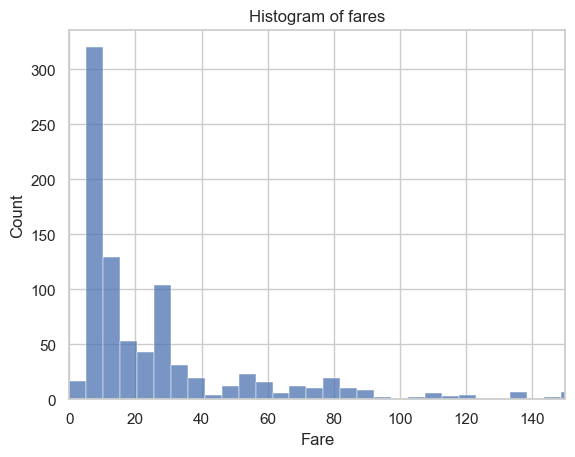

In [17]:
sns.set_theme(style="whitegrid")
sns.histplot(data = train, x='Fare', bins=100)
plt.title("Histogram of fares")
plt.xlim(0, 150)

#### Embarked

In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train[["Embarked", "Survived"]].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [20]:
 train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Parch
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [21]:
 train['Embarked'].fillna(value = 'S', inplace=True)

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

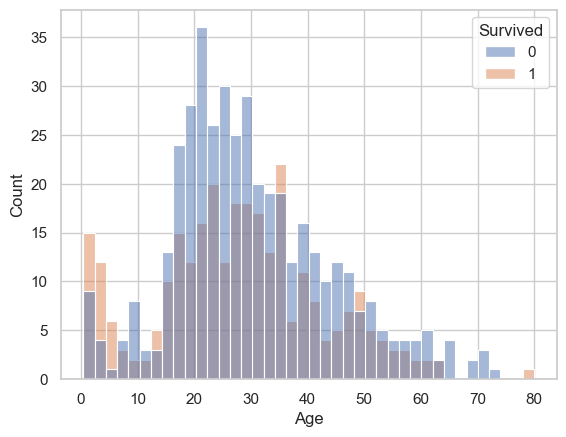

In [22]:
 sns.set_theme(style="whitegrid")
 sns.histplot(data = train, x='Age', bins=40, hue='Survived')

In [23]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Parch
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0


#### Plots using PClass, Gender, Embarked Place
 

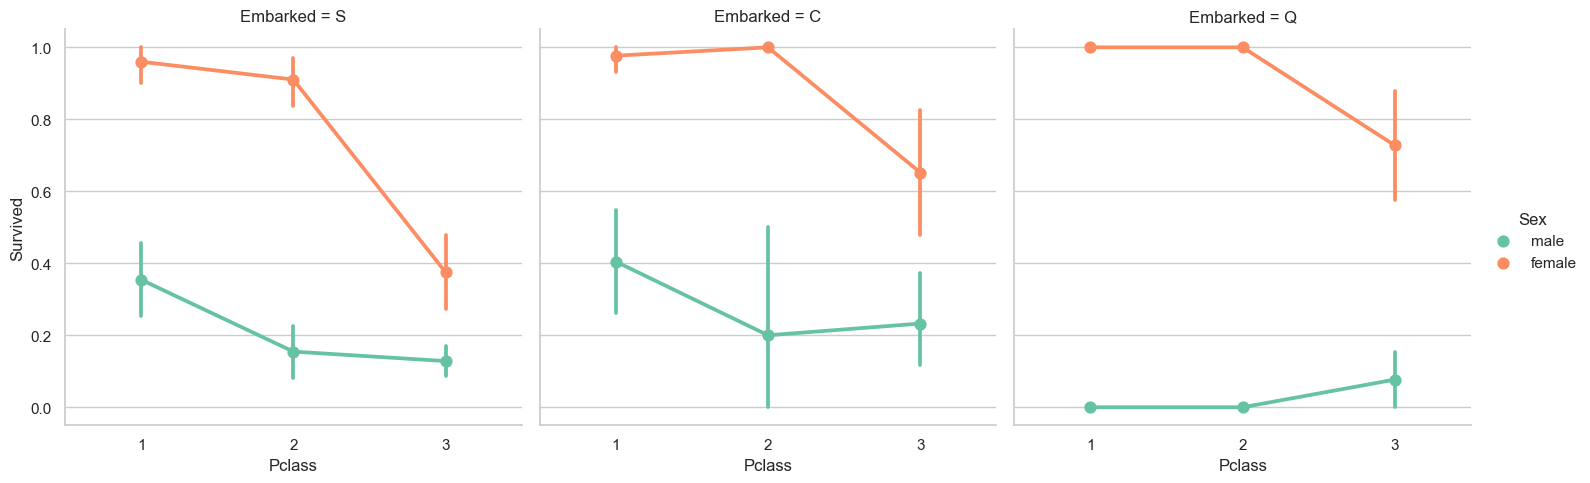

In [24]:
sns.catplot(data=train, x='Pclass', y='Survived', hue='Sex', col='Embarked', palette="Set2", kind='point')

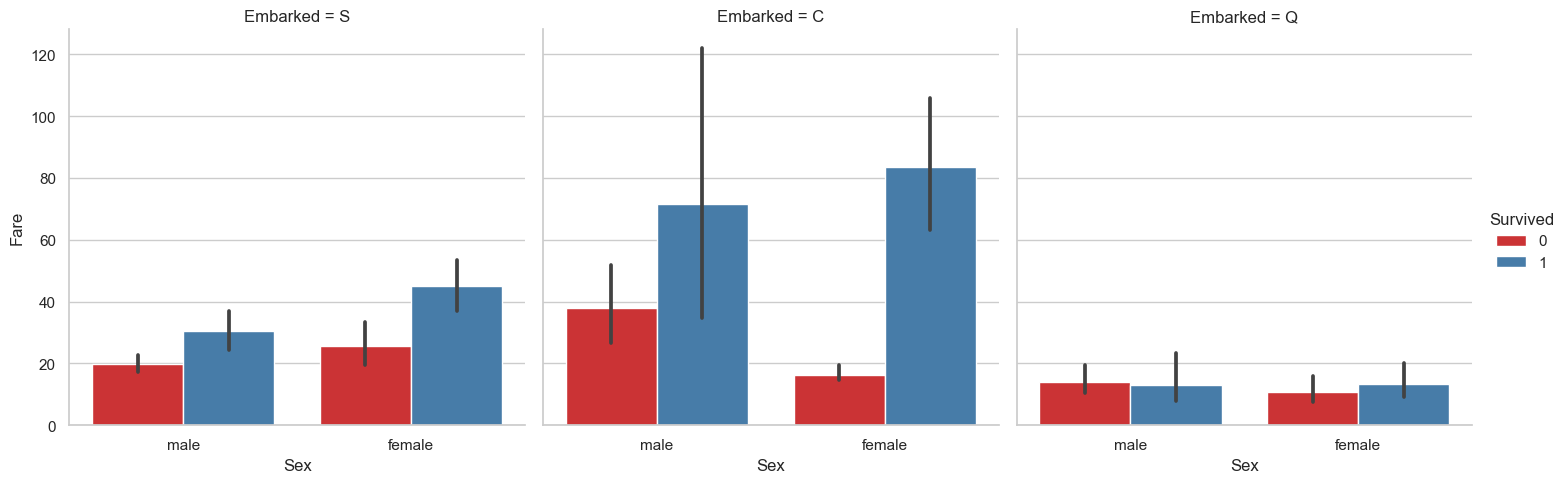

In [25]:
sns.catplot(data=train, y='Fare', hue='Survived', x='Sex', col='Embarked', palette="Set1", kind='bar')

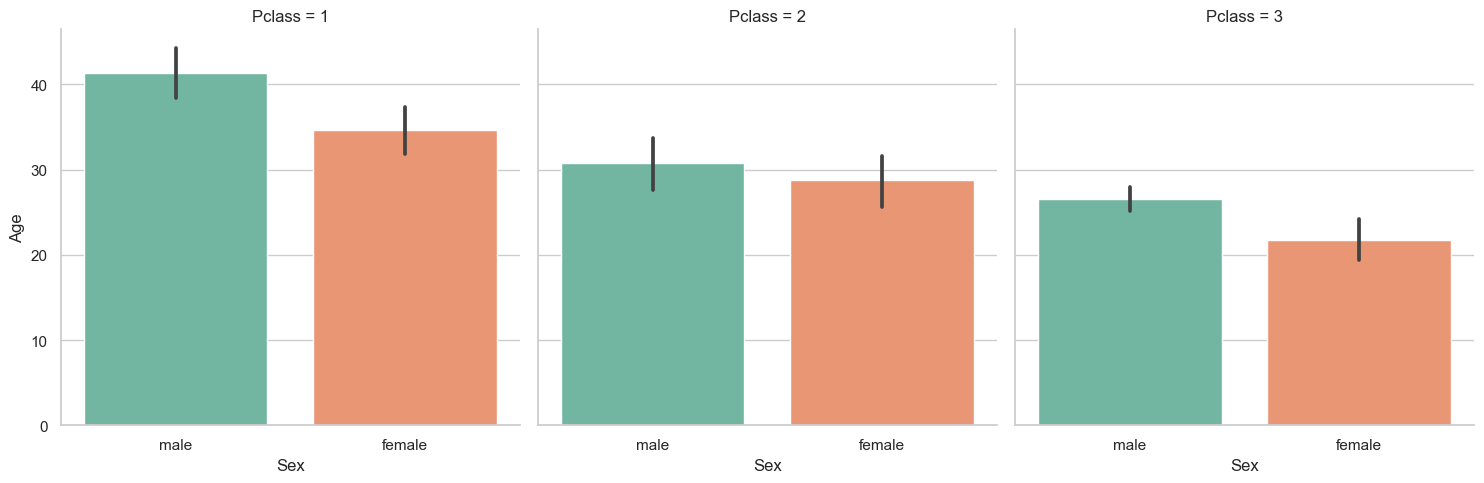

In [26]:
 sns.catplot(data=train, y='Age', x='Sex', col='Pclass', palette="Set2", kind='bar')

In [27]:
for df in [train, test]:
    for sex_ in ['male', 'female']:
        for pclass_ in [1,2,3]:
            median_age = df[(df['Sex']==sex_)&(df['Pclass']==pclass_)]['Age'].dropna().median()
            
            df.loc[(df['Sex']==sex_)&(df['Pclass']==pclass_)&(df['Age'].isnull()), 'Age'] = median_age
            

#### Creating Title Feature

In [28]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
 train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [30]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
train['Title'] = train['Title'].replace(['Mlle','Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [31]:
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
test['Title'] = test['Title'].replace(['Mlle','Ms'], 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [32]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived')

,Title,Survived
2,Mr,0.156673
4,Others,0.347826
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651


In [33]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#### Creating Age Band

In [34]:
for df in [train,test]:
    df['AgeBand'] = pd.cut(df['Age'], 6)

In [35]:
for df in [train,test]:    
    df.loc[ df['Age'] <= 14, 'Age'] = 0
    df.loc[(df['Age'] > 14) & (df['Age'] <= 26), 'Age'] = 1
    df.loc[(df['Age'] > 26) & (df['Age'] <= 40), 'Age'] = 2
    df.loc[(df['Age'] > 40) & (df['Age'] <= 53), 'Age'] = 3
    df.loc[(df['Age'] > 53) & (df['Age'] <= 66), 'Age'] = 4
    df.loc[(df['Age'] > 66) & (df['Age'] <= 80), 'Age'] = 5
    
    df.loc[ df['Fare'] <= 8, 'Fare'] = 0
    df.loc[(df['Fare'] > 8) & (df['Fare'] <= 12), 'Fare'] = 1
    df.loc[(df['Fare'] > 12) & (df['Fare'] <= 21), 'Fare'] = 2
    df.loc[(df['Fare'] > 21) & (df['Fare'] <= 46), 'Fare'] = 3
    df.loc[(df['Fare'] > 46) & (df['Fare'] <= 512), 'Fare'] = 4

#### SibSp + Parch + IsAlone
 

In [36]:
for df in [train,test]:
    df['IsAlone'] = 0
    df.loc[df['SibSp_Parch']==0, 'IsAlone'] = 1

In [37]:
for df in [train,test]:
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q':2} ).astype(int)
    df['Title'] = df['Title'].map( {'Mrs': 0, 'Miss': 1, 'Master':2, 'Others':3, 'Mr':0.156} ).astype(int)

In [38]:
train = train.drop(['Ticket', 'Cabin','PassengerId','Name','AgeBand'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'PassengerId','Name','AgeBand'], axis=1)

In [39]:
for df in [train, test]:
    df['Age'] = df['Age'].astype(int)
    df['Fare'] = df['Fare'].astype(int)

##  Training Logistic Regression Model
 

In [40]:
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score

log_reg = LogisticRegression()

#### Cross Val Score

In [42]:
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")
print(scores)
print("Accuracy :", scores.mean())

[0.7877095  0.80898876 0.79775281 0.80337079 0.80337079]
Accuracy : 0.8002385286548239


In [43]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)

#### Confusion Matrix

In [44]:
confusion_matrix(y_train, y_train_pred)

array([[473,  76],
       [102, 240]], dtype=int64)

<AxesSubplot:>

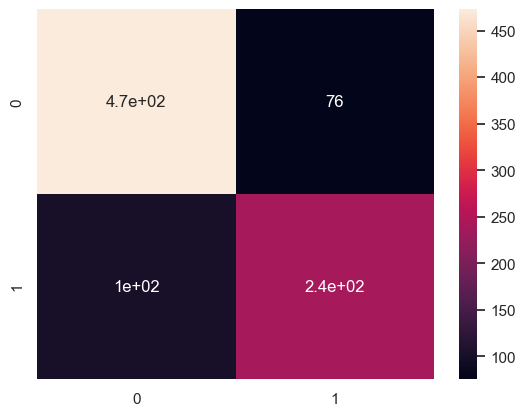

In [45]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

#### Metrics

In [46]:
print("Precision Score :", precision_score(y_train, y_train_pred))
print("Recall Score :", recall_score(y_train, y_train_pred))
print("ROC AUC Score :", roc_auc_score(y_train, y_train_pred))

Precision Score : 0.759493670886076
Recall Score : 0.7017543859649122
ROC AUC Score : 0.7816604352411083


#### ROC Curve

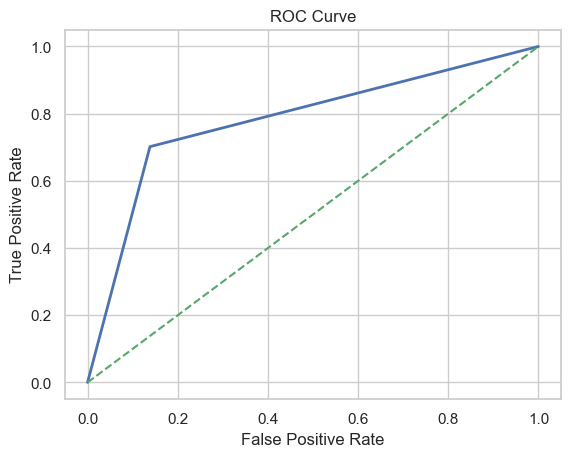

In [47]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
 
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'g--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plot_roc_curve(fpr, tpr)
plt.show()


### Grid Search

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.model_selection import GridSearchCV
grid_search = {"C":np.logspace(-3,3,7), "penalty":["l2"]}
log_reg = LogisticRegression()
grid_search_model = GridSearchCV(log_reg, grid_search, cv=5)

In [53]:
grid_search_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']})

#### Best Model and Accuracy
 

In [54]:
grid_search_model.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [55]:
best_model = grid_search_model.best_estimator_
best_model_pred = best_model.predict(X_train)

print("Accuracy :", accuracy_score(y_train, best_model_pred))

Accuracy : 0.8080808080808081


### Predictions on Test Data
 

In [56]:
test_pred = best_model.predict(X_test)

In [58]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,